# Машинное обучение
## ВМК МГУ, весна 2015/2016
## Лабораторная работа 1. Линейные модели

ФИО: Полушин Владимир Владимирович

Группа: 317

Данное задание посвящено применению линейных моделей в задачах классификации и регрессии. Вы научитесь:
* делать one-hot-кодирование категориальных признаков
* обучать логистическую и линейную регрессию
* отбирать признаки с помощью LASSO
* вычислять метрики качества классификации и регрессии
* выбирать лучший классификатор при ограничениях на точность или полноту
* калибровать вероятности
* реализовывать градиентный спуск (если захотите)


In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Часть 1. Научные гранты в Австралии

![](http://imgur.com/cBdDBO3.jpg)

В данной части мы будем работать с задачей "Predict Grant Applications" (https://www.kaggle.com/c/unimelb/data), где для заявки на грант требуется предсказать, одобрят её или нет. Будем использовать лишь 40 признаков из имеющихся 249. Файлы для работы можно найти по ссылкам:
* https://db.tt/iYzRzQYP (обучение)
* https://db.tt/NGSHb5Qs (контроль)

#### Задание 1
Считайте обучающую и контрольную выборки из файлов с помощью pd.read_csv. Выделите целевую переменную (Grant.Status) в отдельный вектор.

In [3]:
train = pd.read_csv('unimel_train.csv')
data_train = train.drop('Grant.Status', axis=1)
labels_train = train['Grant.Status']
del train

test = pd.read_csv('unimel_test.csv')
data_test = test.drop('Grant.Status', axis=1)
labels_test = test['Grant.Status']
del test

In [17]:
print data_train.shape
data_train[:10]

(6095, 39)


,Grant.Application.ID,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1137,21A,50A,A,230202,50,230203,30,230204,20,...,3098,31,Yes,>=0 to 5,2,0,0,4,2,0
1,4314,4D,10A,D,320801,100,0,0,0,0,...,2553,25,Yes,>=0 to 5,3,1,0,2,0,0
2,2020,NaN,NaN,NaN,320602,50,321004,30,321015,20,...,2813,25,NaN,Less than 0,1,5,0,7,2,0
3,6777,51C,20C,A,291503,60,321402,40,0,0,...,2553,25,NaN,more than 15,2,1,5,6,9,1
4,409,24D,30B,NaN,380107,100,0,0,0,0,...,2923,25,NaN,Less than 0,0,2,0,0,0,0
5,6594,288D,30B,A,321105,100,0,0,0,0,...,2568,25,Yes,>=0 to 5,0,4,0,1,0,2
6,4375,21A,50A,A,380205,40,379902,30,380102,30,...,593,7,Yes,>5 to 10,1,0,1,2,6,0
7,2669,2B,10A,D,410302,40,420306,30,379999,30,...,528,7,Yes,more than 15,0,1,0,2,3,2
8,4692,34B,30C,A,270401,100,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1900,NaN,NaN,C,270802,100,0,0,0,0,...,2578,25,Yes,more than 15,3,1,7,21,31,15


In [42]:
print data_test.shape
data_test[:10]

(2613, 39)


,Grant.Application.ID,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,5031,194B,30C,A,321015,100,0,0,0,0,...,2778,25,Yes,>=0 to 5,2,0,5,0,0,0
1,7856,84D,30B,A,320602,40,320503,60,0,0,...,2678,25,NaN,NaN,1,6,0,0,0,0
2,1122,21A,50A,A,390201,50,390301,30,390203,20,...,3658,22,NaN,>=0 to 5,0,1,0,0,0,0
3,5013,51C,20C,A,291404,100,0,0,0,0,...,2053,19,Yes,>=0 to 5,3,0,5,5,1,0
4,2140,NaN,NaN,NaN,300601,50,300699,25,270602,25,...,1098,1,Yes,>=0 to 5,0,1,3,18,8,12
5,2035,65A,30B,B,NaN,NaN,NaN,NaN,NaN,NaN,...,2578,25,NaN,>5 to 10,2,0,1,0,0,0
6,7881,62B,30B,B,321217,100,0,0,0,0,...,2768,25,Yes,>10 to 15,0,1,0,5,10,9
7,3099,4D,10A,E,320705,100,0,0,0,0,...,2668,25,Yes,Less than 0,1,0,0,0,0,0
8,1442,4D,10A,G,321015,100,0,0,0,0,...,2653,25,NaN,>=0 to 5,2,0,0,0,0,0
9,6677,2B,10A,B,259903,50,250103,30,250303,20,...,3048,31,Yes,>=0 to 5,2,0,13,3,7,7


#### Задание 2
В этом задании мы приведем данные к виду, пригодному для обучения линейных классификаторов. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем здесь нужно масштабирование. Нарисуем распределение трех признаков.

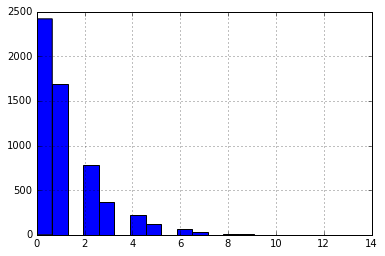

In [28]:
data_train['Number.of.Successful.Grant.1'].hist(bins=20)
plt.show()

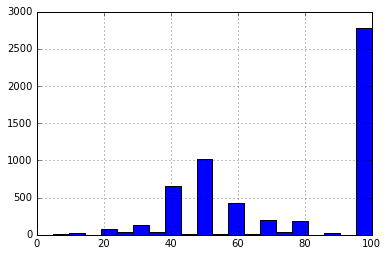

In [29]:
data_train['RFCD.Percentage.1'].hist(bins=20)
plt.show()

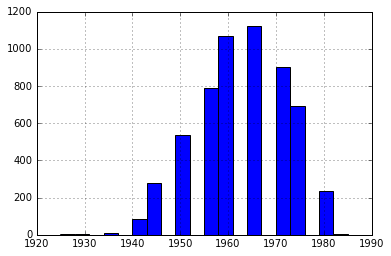

In [30]:
data_train['Year.of.Birth.1'].hist(bins=20)
plt.show()

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые значения признаков явно пропущены, маштабирование уберет пробелы между значениями и, нужные для классификации, функции будут иметь более простой вид. 

В наших данных есть пропуски. Ответьте на вопросы:
1. Сколько всего пропущенных элементов в таблице с обучающей выборкой?
2. Сколько объектов имеют хотя бы один пропуск?
3. Сколько признаков имеют хотя бы одно пропущенное значение?

In [39]:
nans = data_train.isnull().values
print "All gaps: {}".format(np.sum(nans))
print "Objects gaps: {}".format(np.sum(np.any(nans, axis=1)))
print "Features gaps: {}".format(np.sum(np.any(nans, axis=0)))

All gaps: 26843
Objects gaps: 5879
Features gaps: 38


Большинство признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или one-hot-кодирование (также есть подход со счётчиками, который мы уже применяли в прошлых работах). Для начала потренируемся делать бинарное кодирование на трех игрушечных объектах.

In [40]:
simple_data = pd.DataFrame({'City': ['Msk', 'SPb', 'Msk'], 'Weather': ['good', 'bad', 'worst']})
simple_data.head()

,City,Weather
0,Msk,good
1,SPb,bad
2,Msk,worst


In [43]:
# transfrom each object to dict
simple_data_dict = simple_data.T.to_dict().values()
print simple_data_dict

[{'City': 'Msk', 'Weather': 'good'}, {'City': 'SPb', 'Weather': 'bad'}, {'City': 'Msk', 'Weather': 'worst'}]


In [46]:
# apply one-hot-encoding
from sklearn.feature_extraction import DictVectorizer
transformer = DictVectorizer(sparse=False)
data = transformer.fit_transform(simple_data_dict)
print data

[[ 1.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0.]
 [ 1.  0.  0.  0.  1.]]


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками, объекты классов StandardScaler и DictVectorizer и булеву переменную is_test (True, если обрабатывает тестовую выборку и False, если обучающую). В функции должны выполняться следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных. Используйте для выполнения замены функцию fillna. Имена всех вещественных переменных перечислены в numeric_cols.
2. Масштабирование вещественных признаков с помощью StandardScaler (метод fit_transform, если is_test == False, и метод transform в противном случае).
3. One-hot-кодирование категориальных признаков с помощью DictVectorizer (метод fit_transform, если is_test == False, и метод transform в противном случае).

Метод должен возвращать tuple из трех элементов: преобразованной выборки, объекта StandardScaler и объекта DictVectorizer. Преобразованная выборка должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки не должны в ней остаться).

In [5]:
import scipy.sparse

def transform_data(data, scaler, transformer, is_test):
    numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                    'RFCD.Percentage.4', 'RFCD.Percentage.5',
                    'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                    'SEO.Percentage.4', 'SEO.Percentage.5',
                    'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
    numeric_data = data[numeric_cols].fillna(0.0).astype(float).as_matrix()
    str_data = data.drop(numeric_cols, axis=1).fillna('nan').astype(str)
    dict_data = str_data.T.to_dict().values()
    
    if not is_test:
        numeric_data = scaler.fit_transform(numeric_data)
        ohe_data = transformer.fit_transform(dict_data)
    else:
        numeric_data = scaler.transform(numeric_data)
        ohe_data = transformer.transform(dict_data)
        
    return scipy.sparse.hstack((numeric_data, ohe_data)), scaler, transformer

Применяем функцию к данным:

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
scaler = StandardScaler()
transformer = DictVectorizer()
X, scaler, transformer = transform_data(data_train, scaler, transformer, False)
X_test, _, _ = transform_data(data_test, scaler, transformer, True)

Сколько признаков у вас получилось после преобразования?

In [7]:
print X.shape[1]

11734


#### Задание 3
Подберите лучшее значение параметра регуляризации C для логистической регрессии с L2-регуляризатором (sklearn.linear_model.LogisticRegression) с помощью кросс-валидации по 5 блокам. В качестве метрики качества используйте AUC-ROC. Сетка для перебора указана ниже. По итогам кросс-валидации укажите лучшее значение параметра регуляризации. Обучите классификатор с этим параметром на всей обучающей выборке и найдите качество (AUC-ROC) на тестовой выборке.

In [81]:
from sklearn.cross_validation import KFold
cv = KFold(X.shape[0], n_folds=5, shuffle=True, random_state=241)

In [104]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

C_grid = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

for C in C_grid:
    scores = cross_val_score(LogisticRegression(C=C), X, labels_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    print "C: {}, mean score: {}".format(C, np.mean(scores))

C: 0.001, mean score: 0.843165472803
C: 0.01, mean score: 0.873004881018
C: 0.1, mean score: 0.882388242709
C: 1.0, mean score: 0.877056385638
C: 10.0, mean score: 0.865591857211
C: 100.0, mean score: 0.860915778534


In [105]:
from sklearn.metrics import roc_auc_score

lr = LogisticRegression(C=0.1)
lr.fit(X, labels_train)
print roc_auc_score(labels_test, lr.predict_proba(X_test)[:, 1])

0.880344342415


Попробуем теперь логистическую регрессию с L1-регуляризатором (penalty='l1'). Выведите число ненулевых коэффициентов (clf.coef\_) при каждом значении параметра регуляризации из сетки.

In [107]:
for C in C_grid:
    scores = cross_val_score(LogisticRegression(penalty='l1', C=C), 
                             X, labels_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    clf = LogisticRegression(penalty='l1', C=C).fit(X, labels_train)
    print "C: {}, mean score: {}, non-zero coefs: {}".format(C, np.mean(scores), 
                                                             np.sum(np.abs(clf.coef_) > 1e-10))

C: 0.001, mean score: 0.5, non-zero coefs: 0
C: 0.01, mean score: 0.859962397098, non-zero coefs: 9
C: 0.1, mean score: 0.877442142502, non-zero coefs: 58
C: 1.0, mean score: 0.880473536298, non-zero coefs: 667
C: 10.0, mean score: 0.865814599035, non-zero coefs: 2466
C: 100.0, mean score: 0.864184492935, non-zero coefs: 2974


Какое качество на тесте даёт логистическая регрессия с L1-регуляризатором с параметром C=0.01? Сколько для достижения такого качества ей нужно признаков?

In [113]:
lr = LogisticRegression(C=0.01, penalty='l1')
lr.fit(X, labels_train)
print roc_auc_score(labels_test, lr.predict_proba(X_test)[:, 1])
print np.sum(np.abs(lr.coef_) > 1e-10)
print np.where(np.abs(lr.coef_) > 1e-10)[1]

0.852571511465
9
[   11    12   231  6465  6473 10203 10333 11731 11732]


#### Задание 4
В этом задании мы внимательно рассмотрим различные аспекты качества классификатора. Для этого возьмите классификатор с L2-регуляризатором с лучшим значением параметра регуляризации (вы его нашли в предыдущем задании), обучите на полной обучающей выборке и найдите предсказания вероятностей на тесте. Далее будем работать только с этими прогнозами.

In [116]:
lr = LogisticRegression(C=0.1)
lr.fit(X, labels_train)
scores = lr.predict_proba(X_test)[:, 1]

Посчитайте AUC-ROC, AUC-PR (average_precision_score) и log-loss для прогнозов.

In [119]:
from sklearn.metrics import average_precision_score, log_loss

print "AUC-ROC: {}".format(roc_auc_score(labels_test, scores))
print "AUC-RP: {}".format(average_precision_score(labels_test, scores))
print "log-loss: {}".format(log_loss(labels_test, scores))

AUC-ROC: 0.880344342415
AUC-RP: 0.838753258274
log-loss: 0.442736959546


Нарисуйте ROC- и PR-кривые. Не забудьте подписать оси.

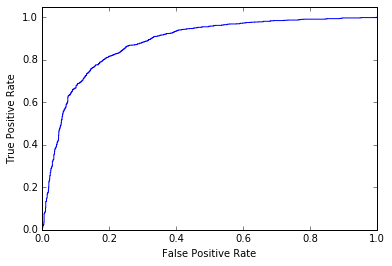

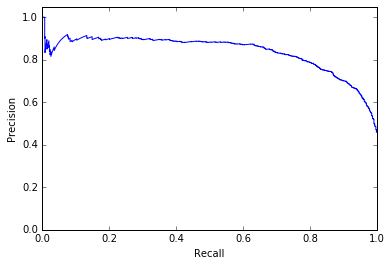

In [129]:
from sklearn.metrics import roc_curve, precision_recall_curve
fpr, tpr, _ = roc_curve(labels_test, scores)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

precision, recall, thresholds = precision_recall_curve(labels_test, scores)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

Допустим, мы хотим построить классификатор, который будет находить не менее 90% успешных грантов. Соответственно, имеем нижнюю границу 90% на полноту. Какую максимальную точность при этом можно получить? При каком значении порога? Для получения ответа проанализируйте массивы, возвращаемые функцией metrics.precision_recall_curve.

In [135]:
idx90 = np.max(np.where(recall > 0.9))
print "Recall: {}".format(recall[idx90])
print "Precision: {}".format(precision[idx90])
print "Threshold: {}".format(thresholds[idx90])

Recall: 0.900083263947
Precision: 0.701948051948
Threshold: 0.314959841398


Возьмите классификатор с порогом из предыдущего пункта и подсчитайте для него F-меру. Почему она получилась маленькой, несмотря на высокую полноту?

In [136]:
print "F-score: {}".format(2 * precision[idx90] * recall[idx90] / (precision[idx90] + recall[idx90]))

F-score: 0.7887632251


F-мера - это гармоническое среднее precision и recall, поэтому оно не превосходит их арифмитического среднего, равного ~0.8.

Допустим, что университету важно подавать как можно меньше заявок, которые окажутся неуспешными — они очень плохо влияют на репутацию. Установим нижнюю границу на точность 80%. Какую максимальную полноту при этом можно обеспечить? При каком пороге?

In [138]:
idx80 = np.min(np.where(precision > 0.8))
print "Recall: {}".format(recall[idx80])
print "Precision: {}".format(precision[idx80])
print "Threshold: {}".format(thresholds[idx80])

Recall: 0.776019983347
Precision: 0.800687285223
Threshold: 0.530097465928


#### Задание 5
В этом задании мы научимся оценивать способность классификатора предсказывать вероятности, а также разберемся с калибровкой.

Начнем с калибровочных кривых. Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [164]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.sum(y_test[np.logical_and(preds >= l, preds < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios)

Проверим её работу на логистической регрессии (поменяйте имена переменных, если это необходимо). Получилась ли почти диагональная калибровочная кривая?

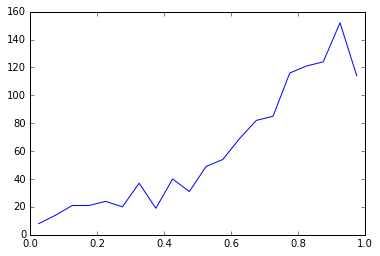

In [165]:
clf = LogisticRegression(C=0.1)
clf.fit(X, labels_train)
preds = clf.predict_proba(X_test)[:, 1]
plot_calibration_curve(labels_test, preds)

Заодно обратим внимание на то, как часто классификатор выдает те или иные вероятности.

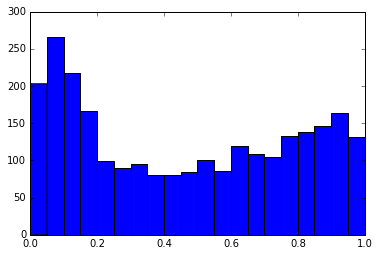

In [168]:
plt.hist(preds, bins=20)
plt.show()

Обучим теперь классификатор с кусочно-линейной функцией потерь (hinge loss, как в SVM).

In [173]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='hinge')
clf.fit(X, labels_train)
preds = clf.decision_function(X_test)
preds = 1.0 / (1.0 + np.exp(-preds))

Изучите распределение ответов классификатора. Чем оно отличается от распределения у логистической регрессии? Чем вы можете объяснить это?

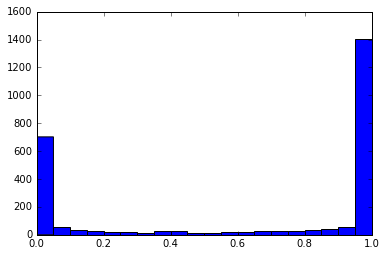

In [174]:
plt.hist(preds, bins=20)
plt.show()

Классификатор слишком сильно склоняется к краям, то есть старается выбрать вероятность либо 0, либо 1. Это происходит из-за того, что функция потерь линейна и сильно штрафует за значения между двумя классами, поэтому оптимальнее обучаться так, чтобы принаждлежность к классу была однозначной.

Нарисуем калибровочную кривую. Видите ли вы какие-либо проблемы в ней?

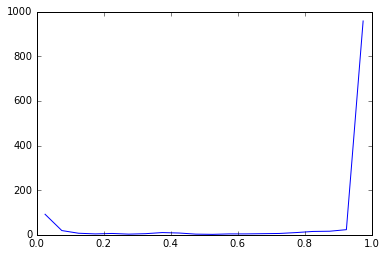

In [175]:
plot_calibration_curve(labels_test, preds)

Из-за того, что вероятности лежат преимущественно в значениях 0 и 1, то в калибровочной кривой посередине почти нет точек.

Попробуем откалибровать вероятности. Грубо говоря, это процедура, которая для каждого отрезка $[a_i, b_i]$ строит преобразование, которое корректирует вероятности в нем, приводя тем самым калибровочную кривую к диагональной форме.

Воспользуйтесь классом sklearn.calibration.CalibratedClassifierCV для калибровки вероятностей на обучении, и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

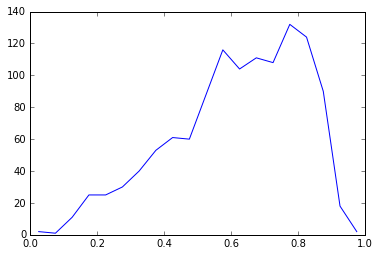

In [184]:
from sklearn.calibration import CalibratedClassifierCV
ccc = CalibratedClassifierCV(SGDClassifier(), method='isotonic')
ccc.fit(X, labels_train)
preds = ccc.predict_proba(X_test)[:, 1]
plot_calibration_curve(labels_test, preds)

#### Задание 6
Здесь вы можете вставить вашу любимую картинку про Австралию.

![australia](australia.jpg)

## Часть 2. Градиентный спуск своими руками
**(опциональная часть, за правильное выполнение к оценке добавляется 3 балла)**

В этой части вам предстоит самостоятельно реализовать градиентный спуск для логистической функции потерь — то есть, по сути, собственными руками обучить логистическую регрессию. Будем использовать данные из предыдущей части.

Добавьте к обучающей и тестовой выборкам единичный признак. Переведите значения целевого вектора в множество $\{-1, +1\}$.

In [8]:
X = scipy.sparse.hstack((X, np.ones((X.shape[0], 1))))
X_test = scipy.sparse.hstack((X_test, np.ones((X_test.shape[0], 1))))
labels_train[labels_train == 0] = -1
labels_test[labels_test == 0] = -1

Для начала реализуйте функции, которые вычисляют функционал, его градиент, а также прогнозы модели.

In [9]:
from scipy.special import expit

def make_pred(X, w):
    """ Returns the predicted probabilities for sample X. """
    return expit(X.dot(w))

In [20]:
def get_func(w, X, y):
    """ Returns the logisctic functional value for sample (X, y) and weights w. """
    return np.mean(np.log(1 + np.exp(-y * X.dot(w))))

In [11]:
def get_grad(w, X, y):
    """ Returns the logistic functional gradient for sample (X, y) and weights w. """
    return X.T.dot(-y / (1 + np.exp(y * X.dot(w)))) / X.shape[0]

Теперь реализуйте градиентный спуск (не стохастический). Функция должна возвращать вектор весов и список значений функционала на каждой итерации. В градиентном спуске должно выполняться не более max_iter итераций.

In [12]:
def grad_descent(X, y, step_size, max_iter):
    vals = np.empty((max_iter,))
    w = np.random.random((X.shape[1])) / 10.0
    for i in xrange(max_iter):
        vals[i] = get_func(w, X, y)
        w = w - step_size * get_grad(w, X, y)
    
    return (w, vals)

Запустите градиентный спуск для значений размера шага из набора [0.001, 1, 10]. Нарисуйте кривые зависимости значения функционала от номера итерации. Проанализируйте их. Вычислите AUC-ROC на тестовой выборке для лучшего из обученных вариантов.

0.001


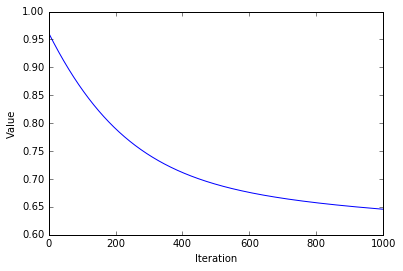

1


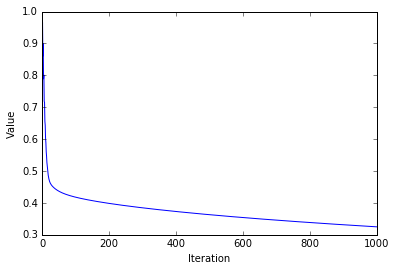

10


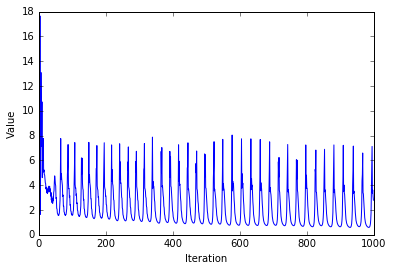

In [25]:
step_sizes = [0.001, 1, 10]
for step_size in step_sizes:
    print step_size
    w, vals = grad_descent(X, labels_train, step_size, 1000)
    plt.plot(np.arange(len(vals)), vals)
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.show()

In [28]:
from sklearn.metrics import roc_auc_score

w, vals = grad_descent(X, labels_train, 1.0, 1000)

print roc_auc_score(labels_test, make_pred(X_test, w))

0.882423582331


Теперь реализуйте стохастический градиентный спуск. Функция должна возвращать вектор весов и список значений функционала на каждой итерации. В стохастическом градиентном спуске должно выполняться не более max_iter итераций.

In [22]:
def get_sdg_grad(w, X, y):
    idx = np.random.randint(X.shape[0])
    return -y[idx] * X.getrow(idx).toarray()[0] / (1 + np.exp(y[idx] * np.sum(w * X.getrow(idx).toarray()[0])))

def sgd(X, y, step_size, max_iter):
    vals = np.empty((max_iter,))
    w = np.random.random((X.shape[1])) / 10.0
    for i in xrange(max_iter):
        vals[i] = get_func(w, X, y)
        w = w - step_size * get_sdg_grad(w, X, y)
    
    return (w, vals)

Подберите размер шага, при котором SGD будет сходиться. Нарисуйте график сходимости. Вычислите AUC-ROC на тестовой выборке.

0.001


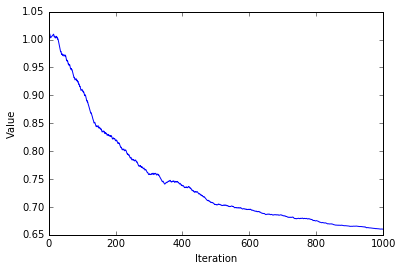

0.005


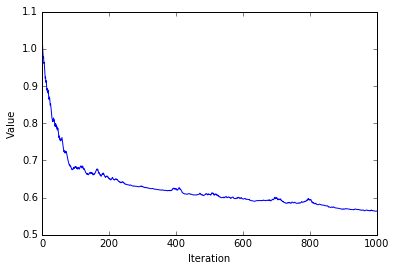

0.01


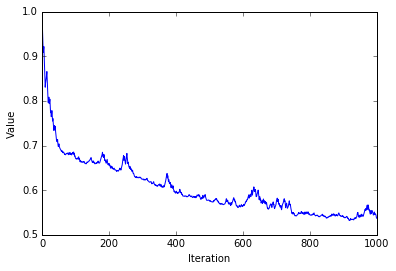

0.05


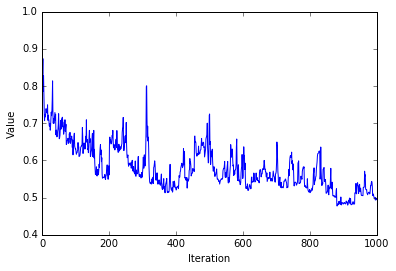

0.1


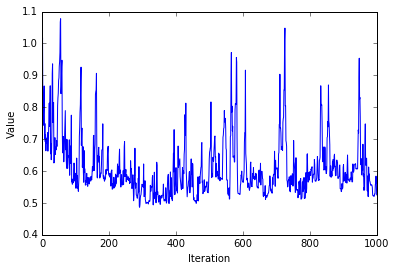

0.5


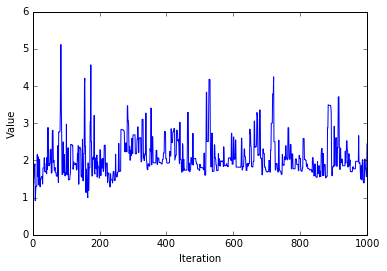

1


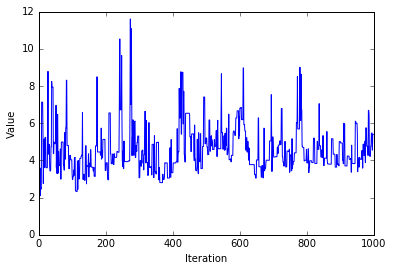

In [29]:
step_sizes = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
for step_size in step_sizes:
    print step_size
    w, vals = sgd(X, labels_train, step_size, 1000)
    plt.plot(np.arange(len(vals)), vals)
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.show()

In [30]:
from sklearn.metrics import roc_auc_score

w, vals = sgd(X, labels_train, 0.01, 10000)

print roc_auc_score(labels_test, make_pred(X_test, w))

0.866348097549


А теперь самое сложное: заново сформируйте выборку с помощью transform_data, но теперь не масштабируйте вещественные признаки. Запустите на этой выборке градиентный спуск. Что вы наблюдаете? Удается ли достичь такого же качества, как и при использовании масштабирования?

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

scaler = StandardScaler(with_mean=False, with_std=False)
transformer = DictVectorizer()
X, scaler, transformer = transform_data(data_train, scaler, transformer, False)
X_test, _, _ = transform_data(data_test, scaler, transformer, True)

1e-07


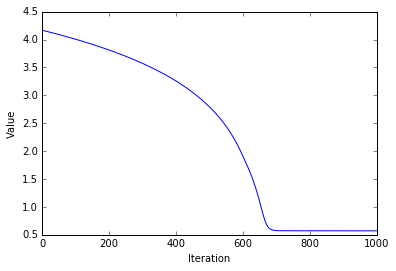

5e-07


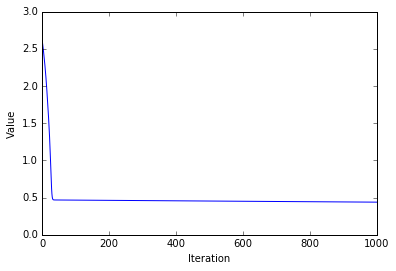

1e-06


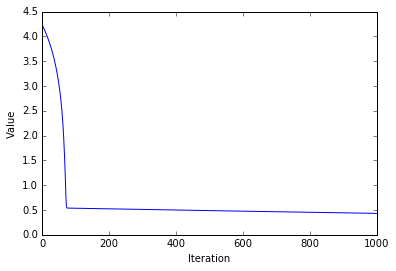

5e-06


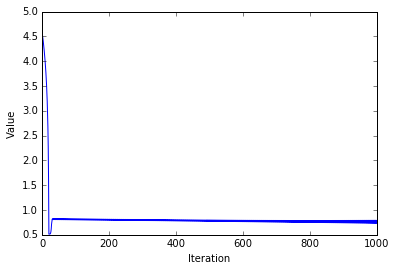

In [48]:
step_sizes = [1e-7, 5e-7, 1e-6, 5e-6]
for step_size in step_sizes:
    print step_size
    w, vals = grad_descent(X, labels_train, step_size, 1000)
    plt.plot(np.arange(len(vals)), np.log(vals))
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.show()

In [53]:
w, vals = grad_descent(X, labels_train, 1e-6, 1000)

print w
print roc_auc_score(labels_test, make_pred(X_test, w))

[ 0.03695078  0.06672963  0.08096588 ...,  0.04784406  0.09920175
  0.04006708]
0.520560946614


1e-08


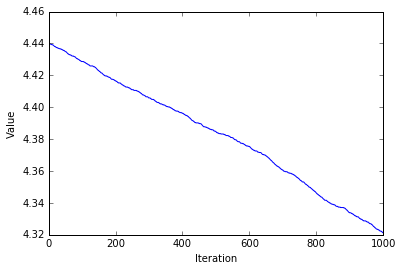

5e-08


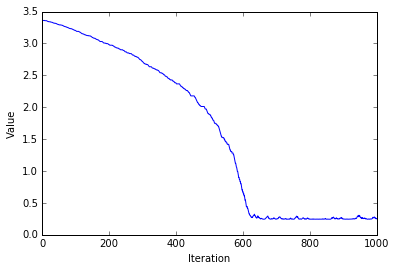

1e-07


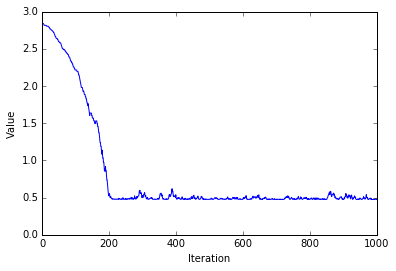

5e-07


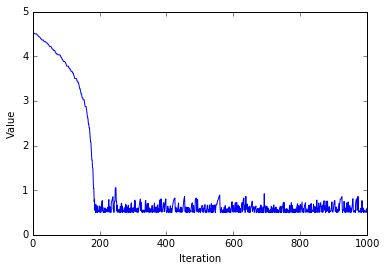

1e-06


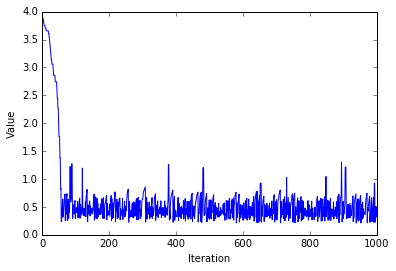

In [55]:
step_sizes = [1e-8, 5e-8, 1e-7, 5e-7, 1e-6]
for step_size in step_sizes:
    print step_size
    w, vals = sgd(X, labels_train, step_size, 1000)
    plt.plot(np.arange(len(vals)), np.log(vals))
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.show()

In [56]:
w, vals = sgd(X, labels_train, 1e-7, 1000)

print w
print roc_auc_score(labels_test, make_pred(X_test, w))

[ 0.01174237  0.08077867  0.00234427 ...,  0.09484723  0.00805063
  0.09760219]
0.490925880935


Без маштабирования градинет получается слишком большим, из-за этого он не может сойтись так же хорошо как в предыдушем эксперименте. Плюс компоненты вектора весов, которые отвечают за вещественные признаки, теперь по размеру отличаются от других и сдвинуты.

Здесь вы можете поделиться своими мыслями по поводу этой части.

Мне кажется, реализовывать градиентный спуск (особенно стохастический) на питоновских циклах можно только ради науки :)

## Часть 3. Линейная регрессия на простом примере

В этой части мы очень кратко разберемся с линейной регрессией и измерением качества ее прогнозов. Будем использовать датасет diabetes.

In [57]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
data = datasets.load_diabetes()
X, X_test, y, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

In [66]:
print y[:10]

[ 145.  281.  129.  277.  186.  214.  245.  222.  197.  277.]


Обучите линейную регрессию с L2-регуляризатором, подобрав лучшее значение параметра регуляризации на тестовой выборке. Используйте MSE в качестве тестовой выборки. При каком значении этого параметра достигается наилучшее качество?

In [63]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha_grid = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
for alpha in alpha_grid:
    clf = Ridge(alpha=alpha).fit(X, y)
    print "Alpha: {} MSE: {}".format(alpha, mean_squared_error(y_test, clf.predict(X_test)))

Alpha: 0.001 MSE: 3120.09020578
Alpha: 0.01 MSE: 3107.38818648
Alpha: 0.1 MSE: 3096.03015101
Alpha: 1.0 MSE: 3399.40482339
Alpha: 10.0 MSE: 4577.48210429
Alpha: 100.0 MSE: 5210.22019186


Вычислите для лучшей из моделей RMSE и коэффициент детерминации (r2_score) на тестовой выборке. Что вы можете сказать о значении коэффицинта детерминации? Насколько данная модель близка к оптимальной?

In [64]:
from sklearn.metrics import r2_score

clf = Ridge(alpha=0.1).fit(X, y)
print "RMSE: {}".format(np.sqrt(mean_squared_error(y_test, clf.predict(X_test))))
print "R2: {}".format(r2_score(y_test, clf.predict(X_test)))

RMSE: 55.6419819113
R2: 0.417024184822


Модель обучается не очень хорошо, RMSE = 50, учитывая, что ответы лежат от 100 до 200, довольно плохо. Коэффициент детерминации 0.4 тоже говорит о не очень хорошем качестве, так как у оптимальной модели этот коэффициент = 1.